In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn  import svm
from sklearn.ensemble import RandomForestClassifier,VotingClassifier;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.decomposition import PCA
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



import warnings
warnings.filterwarnings("ignore")
from PIL import Image
import io
from google.colab import files

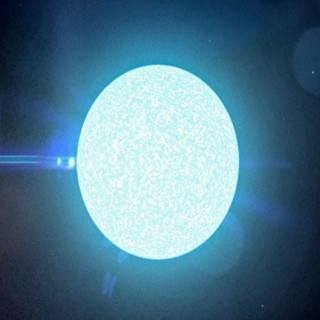

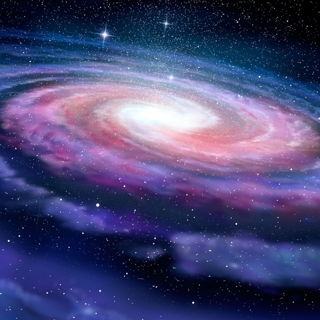

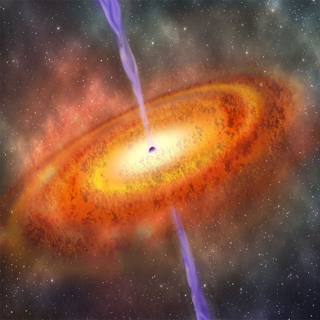

In [ ]:
from IPython.display import HTML, display


image_files = ['/content/sample_data/star.jpg', '/content/sample_data/galaxy.jpg', '/content/sample_data/quasar.jpg']

target_size = (320, 320)
images = []

for file_path in image_files:
    image = Image.open(file_path)
    image = image.resize(target_size)
    images.append(image)

for image in images:
    display(image)

In [2]:
df = pd.read_csv("/content/sample_data/star_classification.csv")
df.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2.0,79.0,6.543777e+18,GALAXY,0.634794,5812.0,56354.0,171.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5.0,119.0,1.176014e+19,GALAXY,0.779136,10445.0,58158.0,427.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2.0,120.0,5.152200e+18,GALAXY,0.644195,4576.0,55592.0,299.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3.0,214.0,1.030107e+19,GALAXY,0.932346,9149.0,58039.0,775.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3.0,137.0,6.891865e+18,GALAXY,0.116123,6121.0,56187.0,842.0


In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
# missing value
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("\n")

Column 'obj_ID' has 78053 unique values:
[1.23766096e+18 1.23766488e+18 1.23766096e+18 ... 1.23766830e+18
 1.23766115e+18 1.23766115e+18]


Column 'alpha' has 99999 unique values:
[135.6891066  144.82610055 142.18878956 ... 224.58740744 212.26862112
 196.89605297]


Column 'delta' has 99999 unique values:
[32.49463184 31.27418489 35.58244418 ... 15.70070739 46.66036528
 49.46464277]


Column 'u' has 93748 unique values:
[23.87882 24.77759 25.26307 ... 21.16916 25.35039 22.62171]


Column 'g' has 92651 unique values:
[22.2753  22.83188 22.66389 ... 19.26997 21.63757 21.79745]


Column 'r' has 91901 unique values:
[20.39501 22.58444 20.60976 ... 18.20428 19.91386 20.60115]


Column 'i' has 92019 unique values:
[19.16573 21.16812 19.34857 ... 17.69034 19.07254 20.00959]


Column 'z' has 92007 unique values:
[18.79371 21.61427 18.94827 ... 20.73569 17.35221 18.62482]


Column 'run_ID' has 430 unique values:
[3606 4518 4192 8102 7773 3716 5934 3927 8157 7712 1412 2821 3015 5416
 6574 7675 2

In [3]:
categorical_list = ["class"]

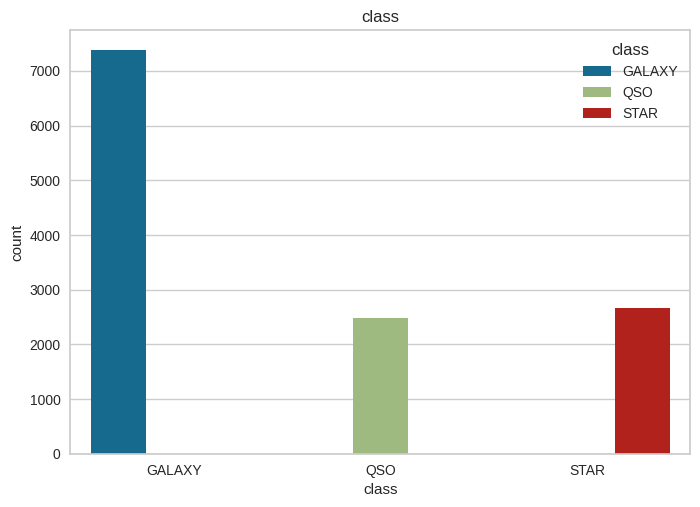

In [4]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "class")
    plt.title(i)

In [ ]:
ex.pie(df,names='class',title='Propotion Of Different Class',hole=0.33)

In [ ]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [5]:
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['redshift'],name='RedShift Box Plot',boxmean=True)
tr2=go.Histogram(x=df['redshift'],name='RedShift Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of RedShift")
fig.show()

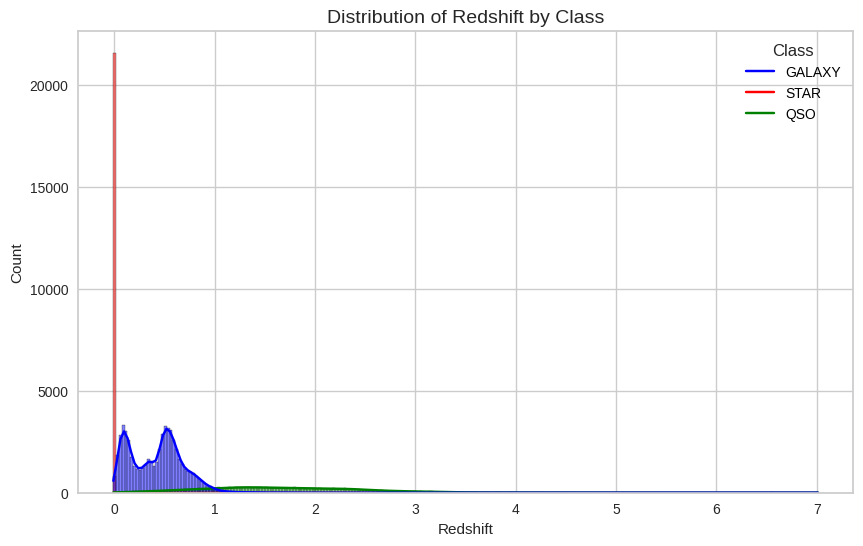

In [ ]:
custom_palette = {
    'GALAXY': 'blue',
    'STAR': 'red',
    'QSO': 'green'
}

# Sort the DataFrame by class
df = df.sort_values(by='class')

plt.figure(figsize=(10, 6))
hist = sns.histplot(data=df, x='redshift', hue='class', kde=True, element='bars', common_norm=False, palette=custom_palette)

# Manually set the legend labels and colors
legend_labels = ['GALAXY', 'STAR', 'QSO']
legend_colors = [custom_palette[class_label] for class_label in legend_labels]

legend = plt.legend(title='Class', labels=legend_labels, facecolor='white', title_fontsize=12, markerscale=2, loc='upper right')

for i, text in enumerate(legend.get_texts()):
    text.set_color('black')  # Set legend text color to black

for i, handle in enumerate(legend.legendHandles):
    handle.set_color(legend_colors[i])  # Set legend box color

plt.title("Distribution of Redshift by Class", fontsize=14)
plt.xlabel("Redshift")
plt.ylabel("Count")

plt.show()

In [ ]:
df.head()
columns = df.columns.tolist()
columns

['obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'rerun_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'class',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

In [ ]:
LE = LabelEncoder()
df["class"] = LE.fit_transform(df["class"])

def log_plot(columns):
    # Determine the number of rows and columns for the grid
    n_cols = 3
    n_rows = int(np.ceil(len(columns) / n_cols))

    # Create a figure and an array of subplots with 3 columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    # Flatten the axes array if there is only one row
    if n_rows == 1:
        axes = axes.flatten()

    # Loop through the columns and plot each one in a subplot
    for idx, column in enumerate(columns):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]

        for i in range(3):
            sns.kdeplot(
                data=np.log(df[df["class"] == i][column]),
                label=LE.inverse_transform([i]),
                ax=ax,
            )

        sns.kdeplot(data=np.log(df[column]), label=["All"], ax=ax)
        ax.legend()

    # If there are any unused subplots, remove them
    for idx in range(len(columns), n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    plt.show()


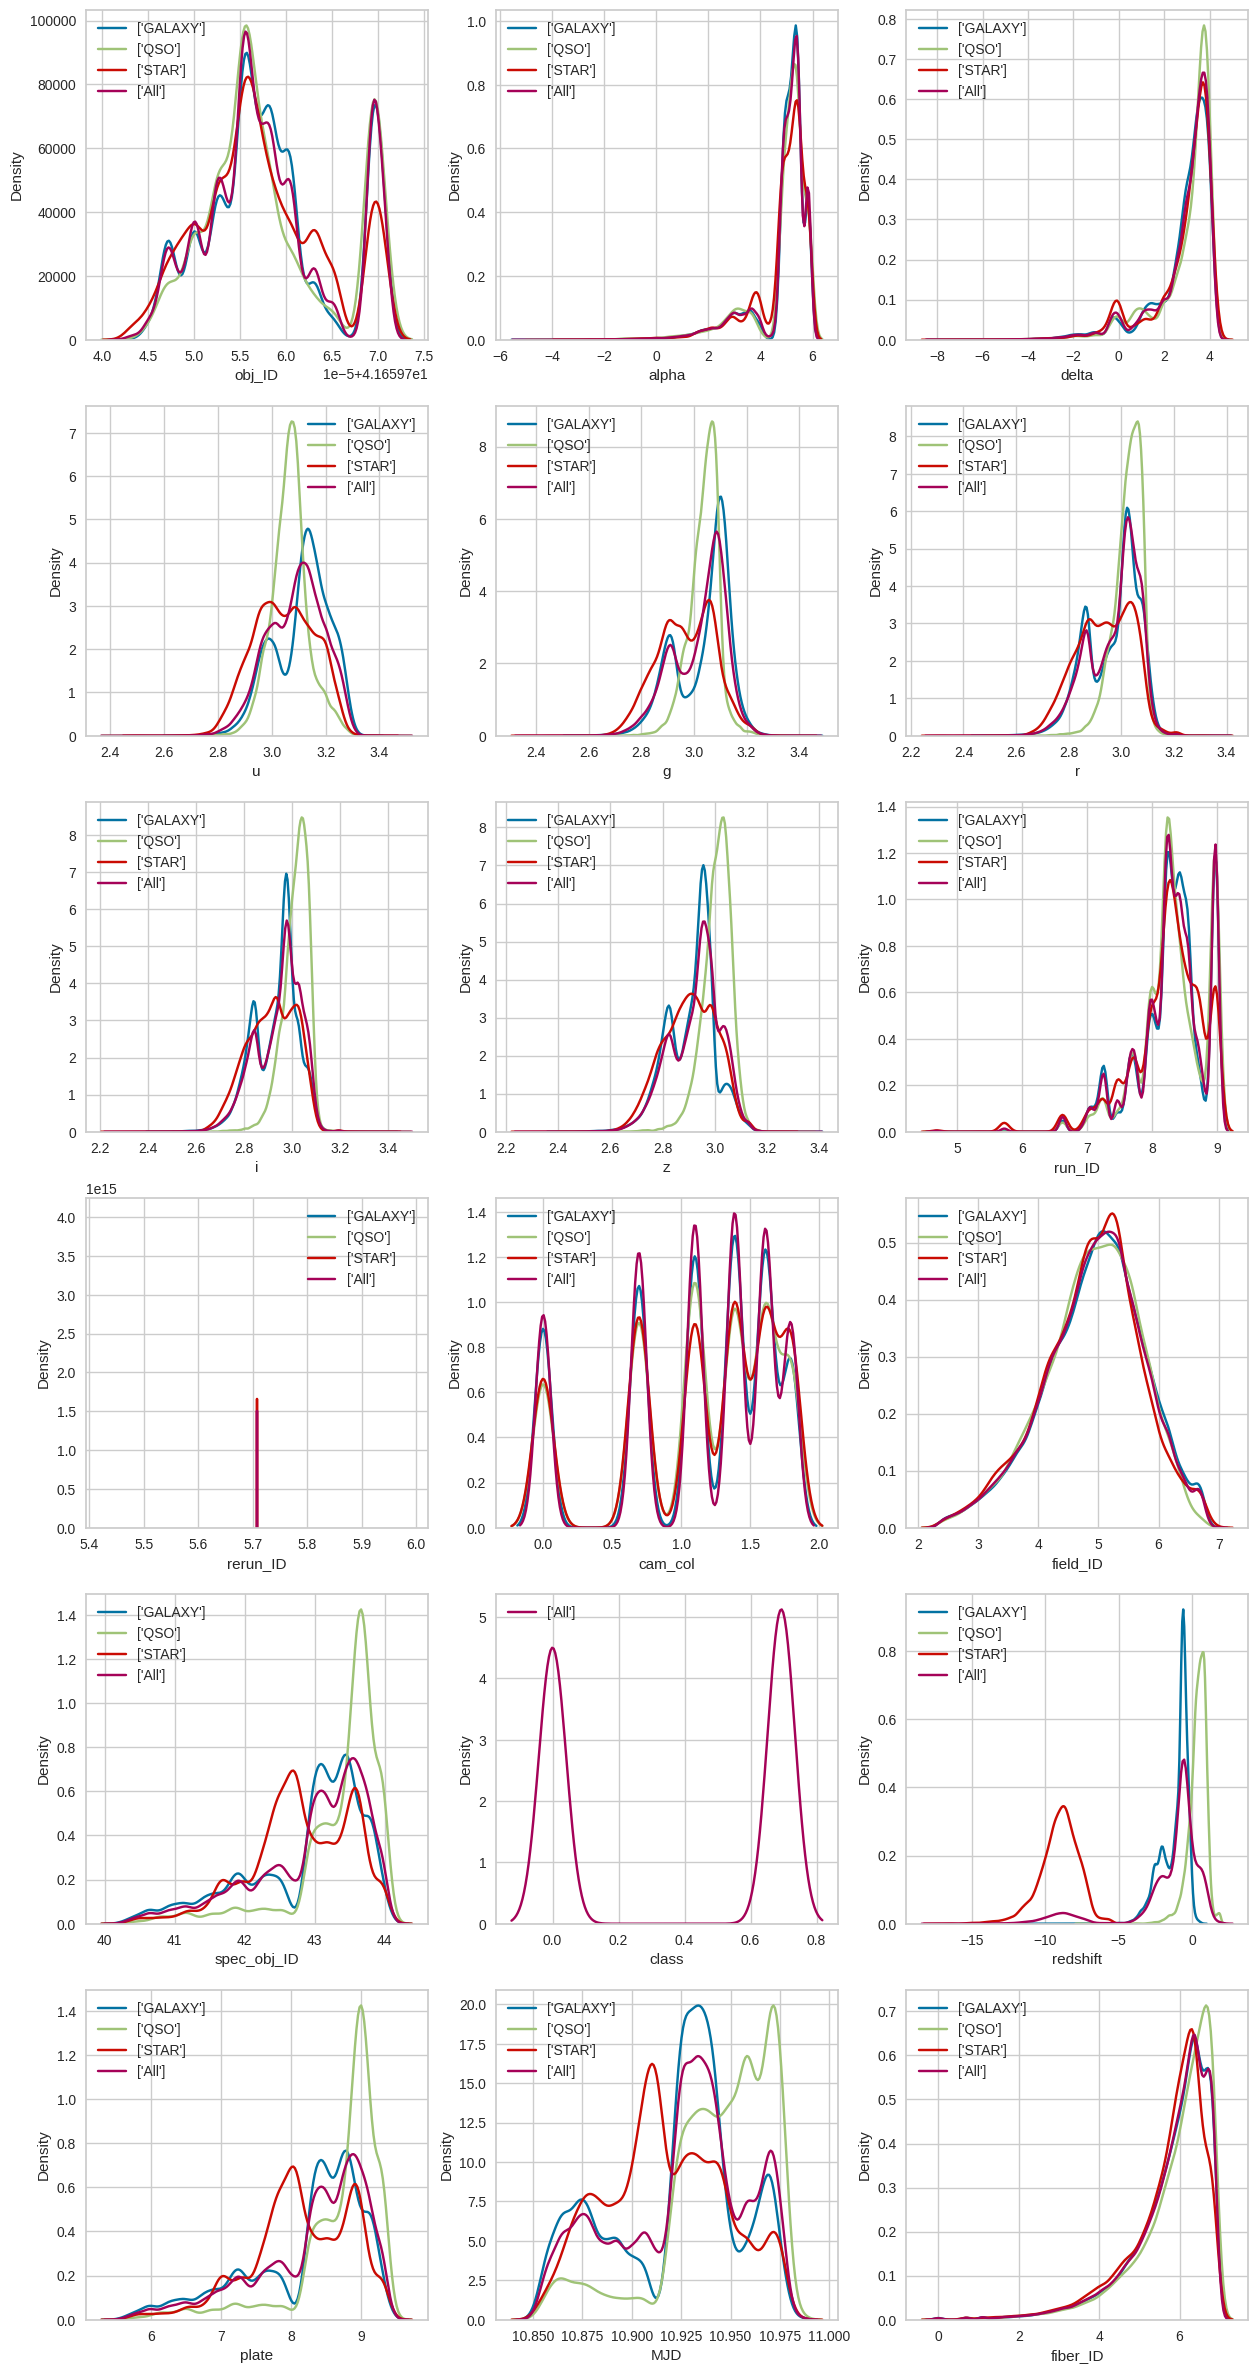

In [ ]:
log_plot(columns)

In [ ]:
df = df.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 68798
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   u            100000 non-null  float64
 1   g            100000 non-null  float64
 2   r            100000 non-null  float64
 3   i            100000 non-null  float64
 4   z            100000 non-null  float64
 5   spec_obj_ID  100000 non-null  float64
 6   class        100000 non-null  int64  
 7   redshift     100000 non-null  float64
 8   plate        100000 non-null  int64  
 9   MJD          100000 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 8.4 MB


Detect Outliers

In [ ]:
numeric_list = [ "u","g","r","i","z","spec_obj_ID","redshift","plate","MJD",]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0.779136,10445,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,0.644195,4576,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0.116123,6121,56187


In [ ]:
# outlier detection
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)

In [ ]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold = np.quantile(x_score , .10)
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

In [ ]:
threshold

-2.3191353459944413

In [ ]:
len(outlier_index)

10000

In [ ]:
df.drop(outlier_index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   u            90000 non-null  float64
 1   g            90000 non-null  float64
 2   r            90000 non-null  float64
 3   i            90000 non-null  float64
 4   z            90000 non-null  float64
 5   spec_obj_ID  90000 non-null  float64
 6   class        90000 non-null  int64  
 7   redshift     90000 non-null  float64
 8   plate        90000 non-null  int64  
 9   MJD          90000 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 7.6 MB


Numerical Feature Analysis

In [ ]:
numerical_list = ["u","g","r","i","z","spec_obj_ID","class","redshift","plate","MJD",]

Feature Selection

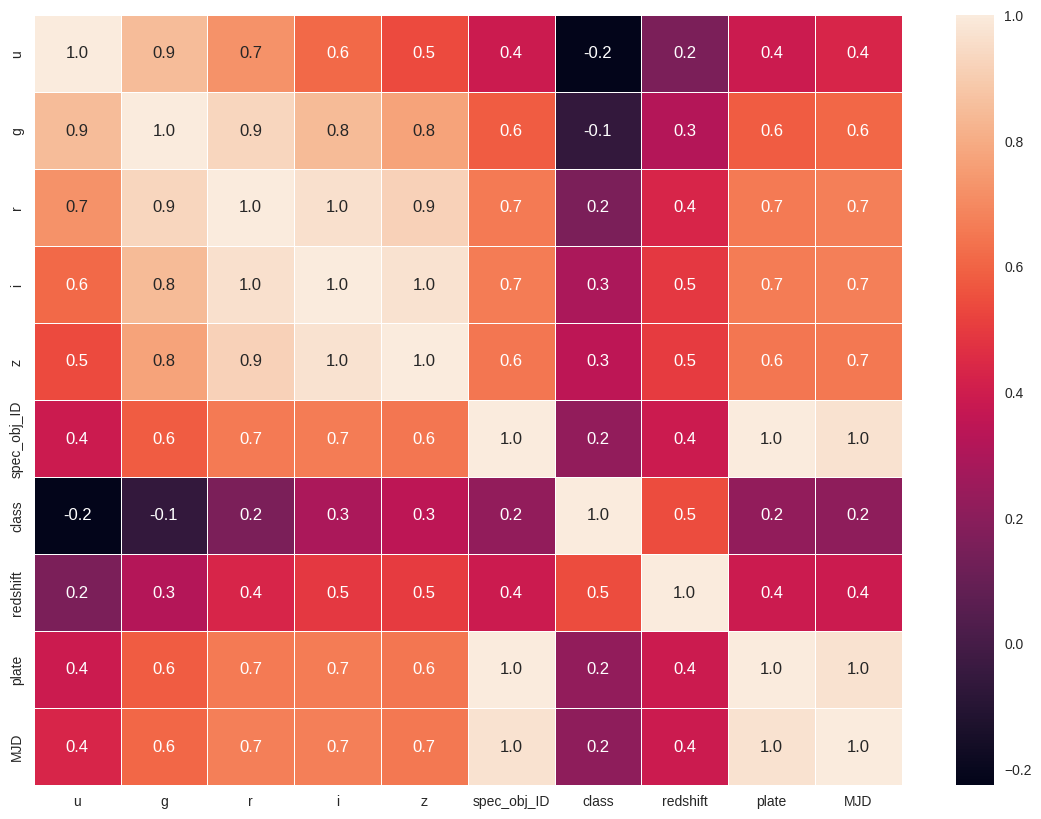

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [ ]:
corr = df.corr()

In [ ]:
corr["class"].sort_values()

u             -0.225714
g             -0.061782
r              0.157767
MJD            0.212281
spec_obj_ID    0.222530
plate          0.222530
i              0.291800
z              0.347889
redshift       0.541136
class          1.000000
Name: class, dtype: float64

In [ ]:
df.head()

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0,0.779136,10445,58158
2,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,0,0.644195,4576,55592
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0,0.116123,6121,56187


Dealing with Imbalancing

In [ ]:
x = df.drop(["class"], axis = 1)
y = df.loc[:,"class"].values

In [ ]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 53812, 1: 18999, 2: 17189})
Resampled dataset shape Counter({0: 53812, 2: 53812, 1: 53812})


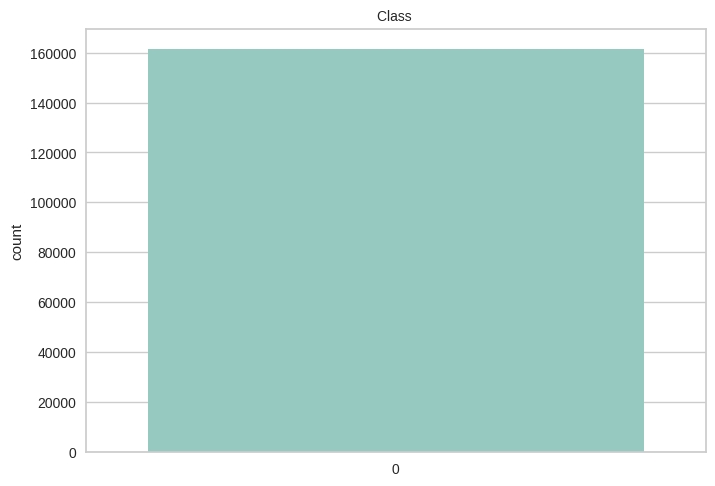

In [ ]:
sns.countplot(y, palette='Set3')
plt.title("Class ",fontsize=10)
plt.show()

Standardization

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Principle Component Analysis

In [ ]:
y=pd.DataFrame(y,columns=["class"])

In [ ]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [ ]:
finalDf = pd.concat([principalDf, y[['class']]], axis = 1)

In [ ]:
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,class
0,-0.870686,-0.617430,-0.738834,-0.710390,0
1,-4.011646,0.112387,-0.918934,0.071098,0
2,-0.822840,-1.589210,-0.724573,-0.935421,0
3,-2.718768,0.530378,-0.656320,-0.211055,0
4,2.897949,2.368981,-0.930490,-0.792824,0
...,...,...,...,...,...
161431,-1.880182,0.649517,1.075257,-0.149181,2
161432,-1.149242,0.235134,1.778343,-0.210964,2
161433,2.960233,-1.096004,1.050110,0.694247,2
161434,-1.921649,1.124134,0.990155,0.082139,2


In [ ]:
pca.explained_variance_ratio_

array([0.67500743, 0.1602524 , 0.10105421, 0.04554191])

Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.33, random_state = 42)

In [ ]:
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (108162, 4)
x_test: (53274, 4)
y_train: (108162, 1)
y_test: (53274, 1)


Support Vector Machine (SVM)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

svm_clf = svm.SVC(kernel='rbf', C=10, random_state=0)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.975


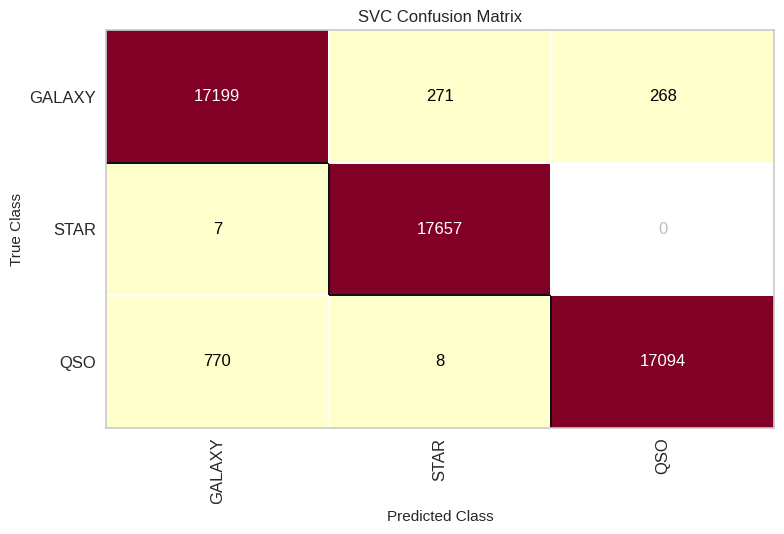

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
svm_cm = ConfusionMatrix(svm_clf, classes=['GALAXY','STAR','QSO'])

svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17738
           1       0.98      1.00      0.99     17664
           2       0.98      0.96      0.97     17872

    accuracy                           0.98     53274
   macro avg       0.98      0.98      0.98     53274
weighted avg       0.98      0.98      0.98     53274



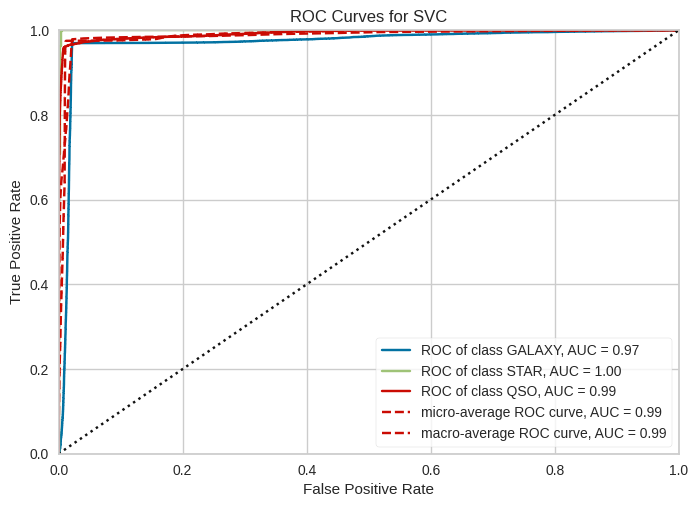

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(svm_clf, classes=['GALAXY','STAR','QSO'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [ ]:
y_test_array = y_test.to_numpy()

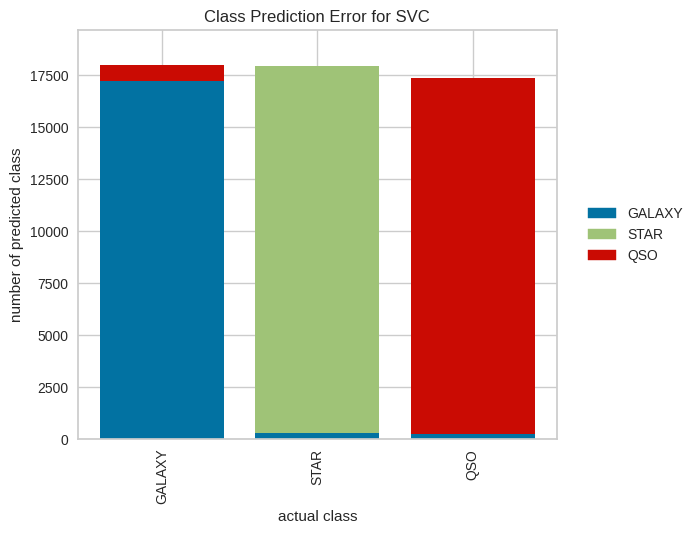

<Axes: title={'center': 'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(svm_clf, classes=['GALAXY','STAR','QSO'])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test_array.ravel())
visualizer.show()

In [ ]:
classes = ['GALAXY','STAR','QSO']

Random Forest Classifier

In [ ]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.983


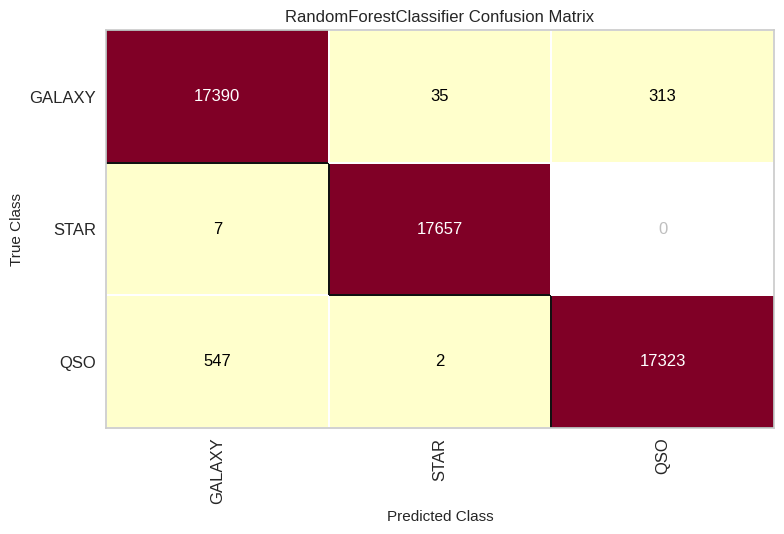

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
r_forest_cm = ConfusionMatrix(r_forest, classes=['GALAXY','STAR','QSO'])

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17738
           1       1.00      1.00      1.00     17664
           2       0.98      0.97      0.98     17872

    accuracy                           0.98     53274
   macro avg       0.98      0.98      0.98     53274
weighted avg       0.98      0.98      0.98     53274



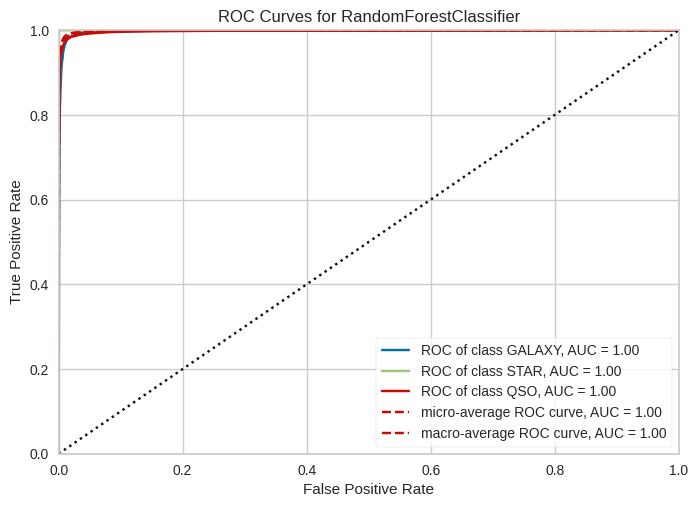

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(r_forest, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [ ]:
y_test_array = y_test.to_numpy()

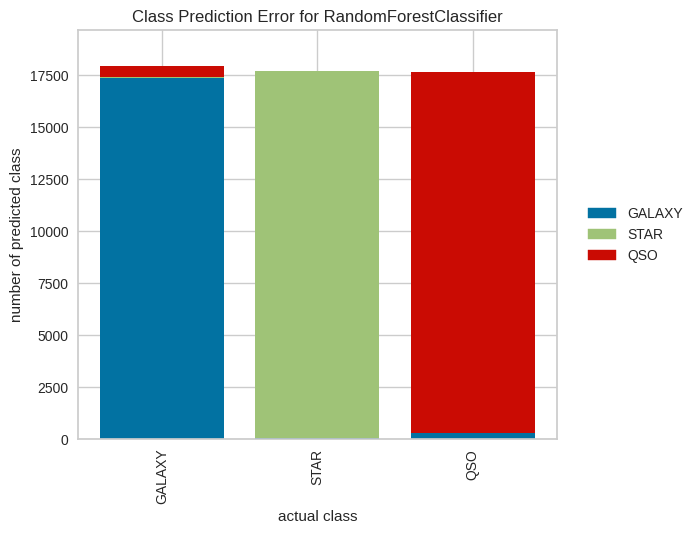

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(r_forest, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test_array.ravel())
visualizer.show()

KNN (K-Nearest Neighbors)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
y_predicted_KNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))

Accuracy : 0.954


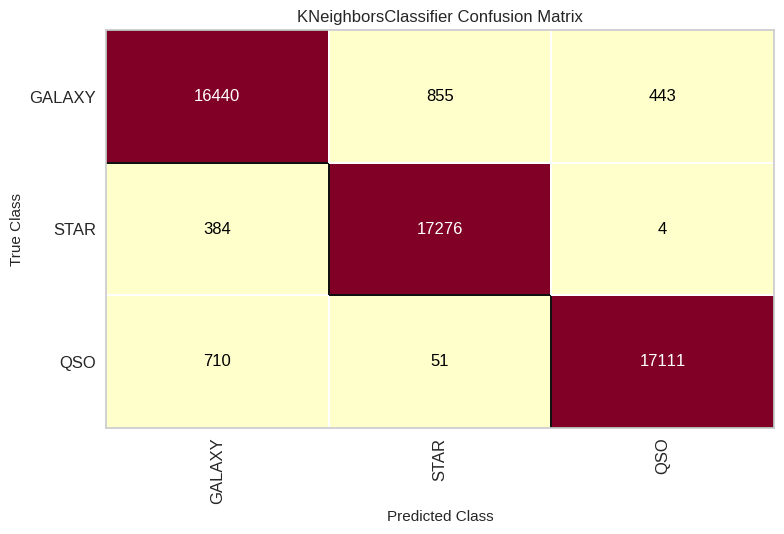

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
KNN_cm = ConfusionMatrix(KNN, classes=['GALAXY', 'STAR', 'QSO'])
KNN_cm.fit(x_train, y_train)
KNN_cm.score(x_test, y_test)
KNN_cm.show()

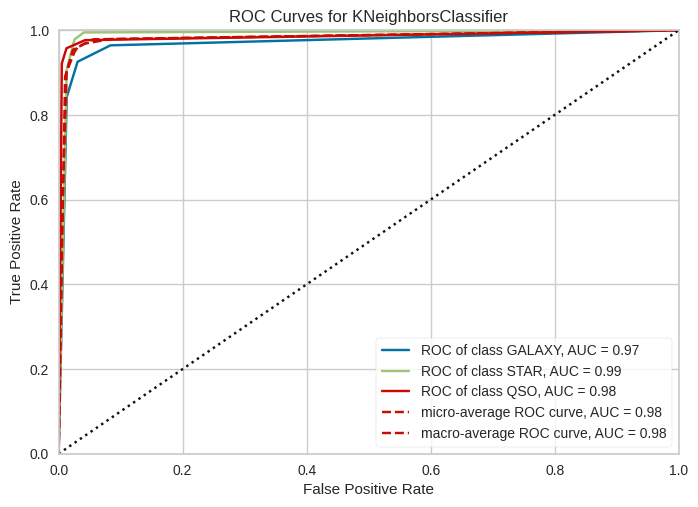

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(KNN, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [ ]:
print(classification_report(y_test, y_predicted_KNN))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     17738
           1       0.95      0.98      0.96     17664
           2       0.97      0.96      0.97     17872

    accuracy                           0.95     53274
   macro avg       0.95      0.95      0.95     53274
weighted avg       0.95      0.95      0.95     53274



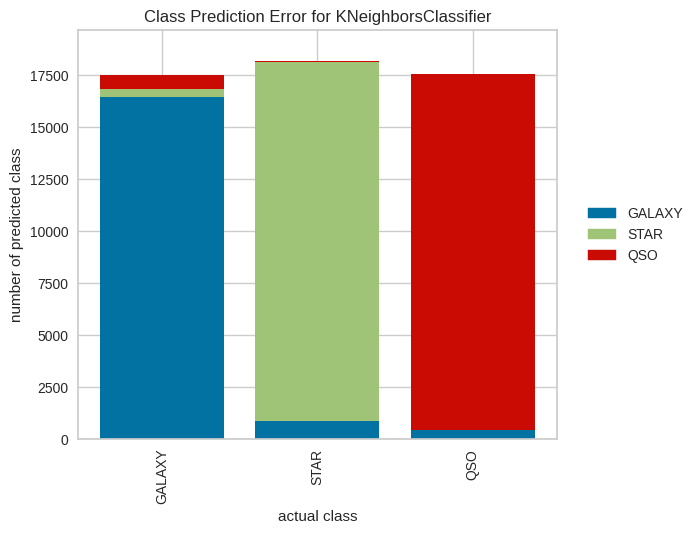

<Axes: title={'center': 'Class Prediction Error for KNeighborsClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(KNN, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test_array.ravel())
visualizer.show()

Logistic Regression

In [ ]:
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR.fit(x_train,y_train)
y_predicted_LR = LR.predict(x_test)
score = LR.score(x_test, y_test)
LR_score_ = np.mean(score)
print('Accuracy : %.3f' % (LR_score_))

Accuracy : 0.956


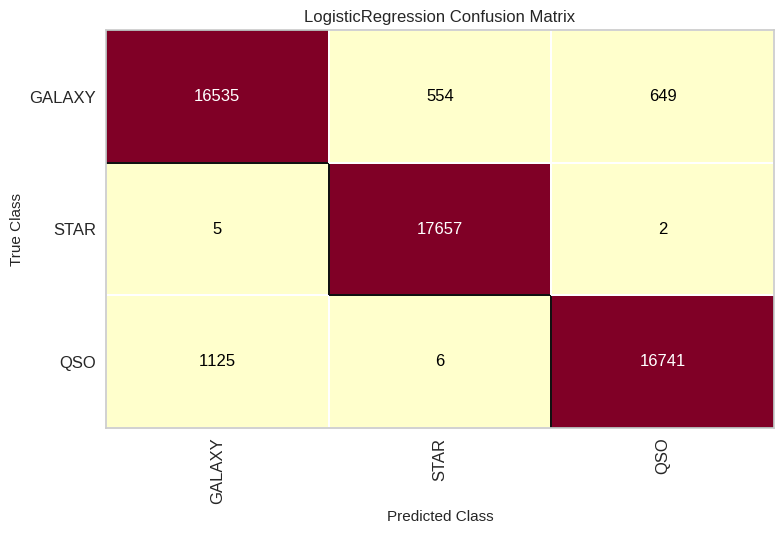

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
LR_cm = ConfusionMatrix(LR, classes=['GALAXY', 'STAR', 'QSO'])
LR_cm.fit(x_train, y_train)
LR_cm.score(x_test, y_test)
LR_cm.show()

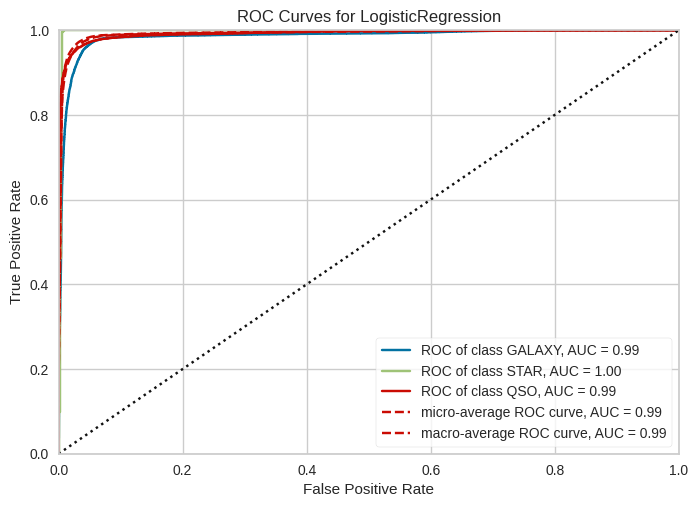

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(LR, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [ ]:
print(classification_report(y_test, y_predicted_LR))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     17738
           1       0.97      1.00      0.98     17664
           2       0.96      0.94      0.95     17872

    accuracy                           0.96     53274
   macro avg       0.96      0.96      0.96     53274
weighted avg       0.96      0.96      0.96     53274



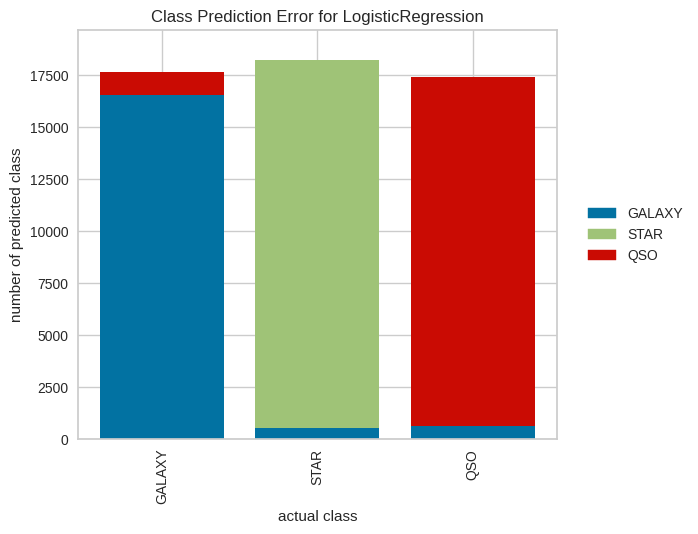

<Axes: title={'center': 'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
visualizer = ClassPredictionError(LR, classes=["GALAXY", "STAR", "QSO"])

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test_array.ravel())
visualizer.show()